In [1]:
# Import libraries need for Linear Regression Model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('Advertising.csv')

In [3]:
dt

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# Removing the duplicates
dt.drop_duplicates (inplace=True)

In [5]:
# getting Top 10 recordes in the dataset
dt.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [6]:
# getting Bottom 10 recordes in the dataset
dt.tail(10)

,Unnamed: 0,TV,radio,newspaper,sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
# Display the shape of the dataset
print ('The shape of the dataset is', dt.shape)

The shape of the dataset is (200, 5)


In [8]:
# Dataframe columns
dt.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.4 KB


In [10]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column Unnamed: 0 has [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200] unique elements
****************************************************************************************************
This column TV has [230.1  44.5  17.2 151.5

In [11]:
# To find the number of types of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].nunique(),'unique elements')
    print ('*'*100)

This column Unnamed: 0 has 200 unique elements
****************************************************************************************************
This column TV has 190 unique elements
****************************************************************************************************
This column radio has 167 unique elements
****************************************************************************************************
This column newspaper has 172 unique elements
****************************************************************************************************
This column sales has 121 unique elements
****************************************************************************************************


In [12]:
# To find NAN values in the dataset
dt.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [13]:
# The data analysis is done by describe function.
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [14]:
# To find the correlection in the dataset
dt.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [15]:
e=dt.corr()

<AxesSubplot:>

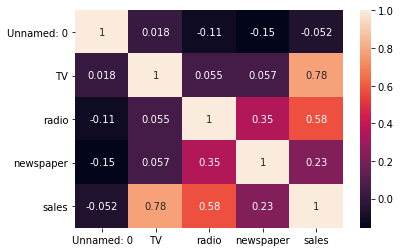

In [16]:
# Ploting the heatmap for better understanding
sns.heatmap(e,annot=True)

In [17]:
# Survived corr has been hilighted
e['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

In [18]:
# The Unamed are general and does not affect the sales
dt.drop(['Unnamed: 0'], axis=1, inplace=True)

In [19]:
dt

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


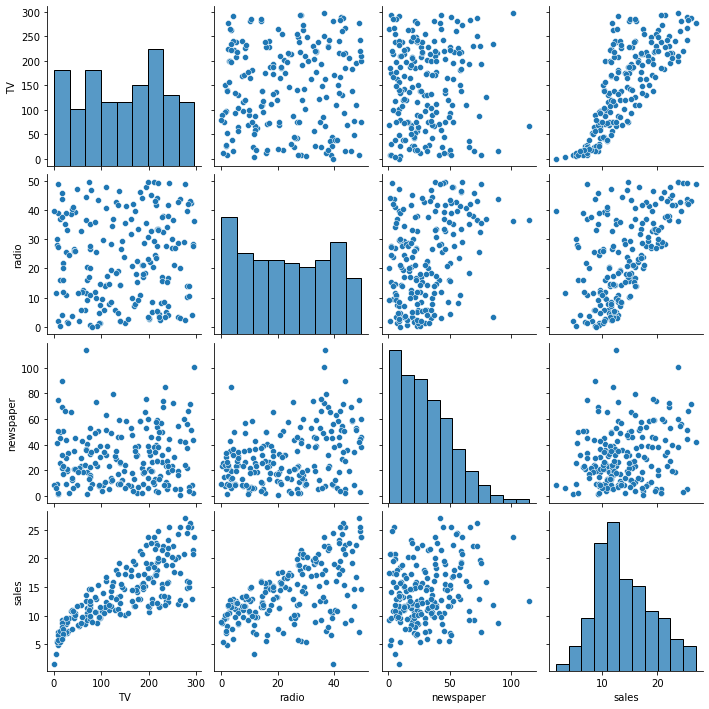

In [20]:
# Pairplot gives a relationship between the variables
sns.pairplot(dt)

In [21]:
dt.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

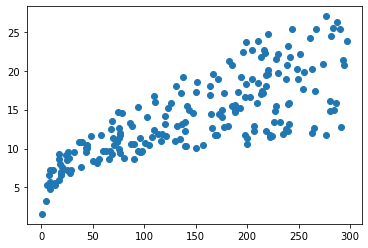

In [22]:
# TV Vs Sales
plt.scatter(dt['TV'],dt['sales'])

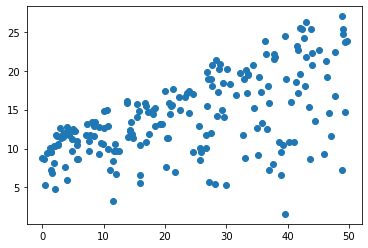

In [23]:
# Radio Vs Sales
plt.scatter(dt['radio'],dt['sales'])

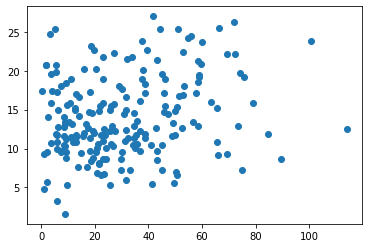

In [24]:
# Newspaper Vs Sales
plt.scatter(dt['newspaper'],dt['sales'])

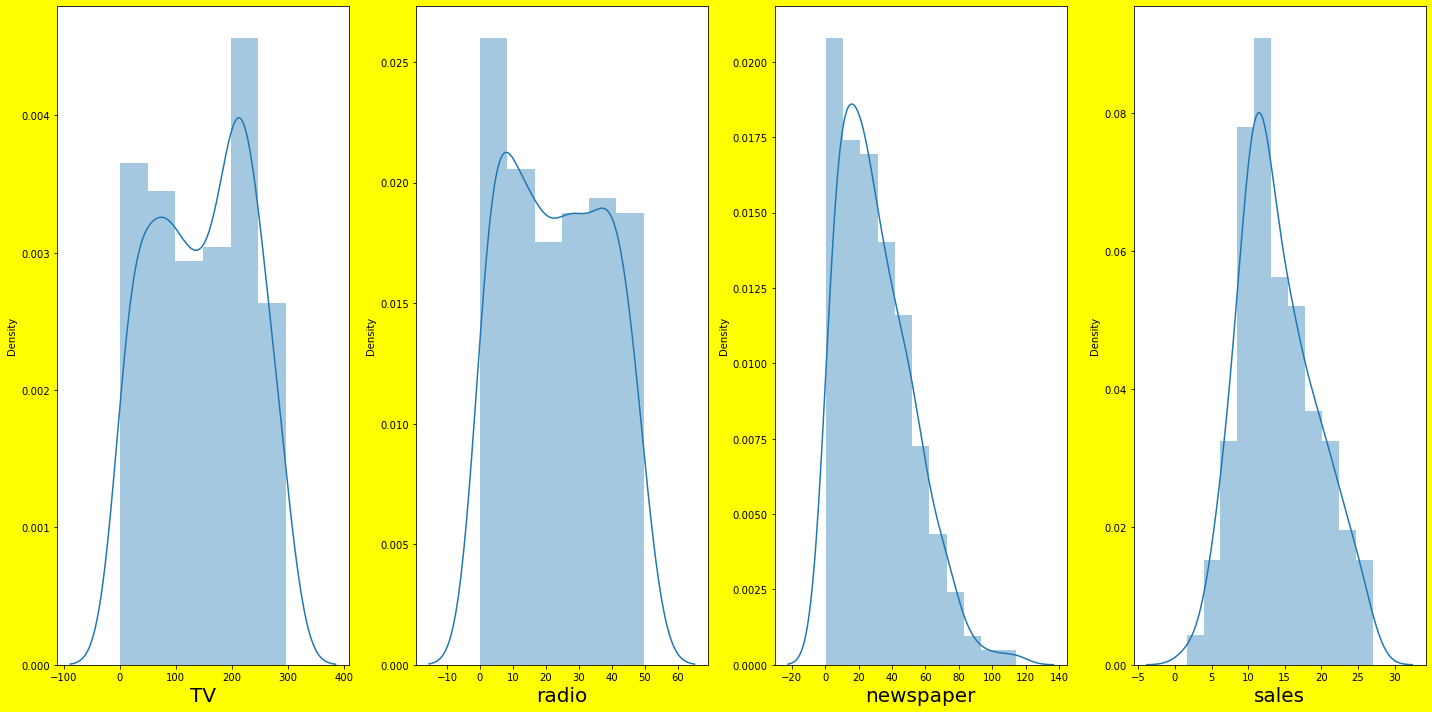

In [25]:
# Statistical analysis
plt.figure(figsize=(20,10), facecolor='yellow')
plotnumber=1
for column in dt:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

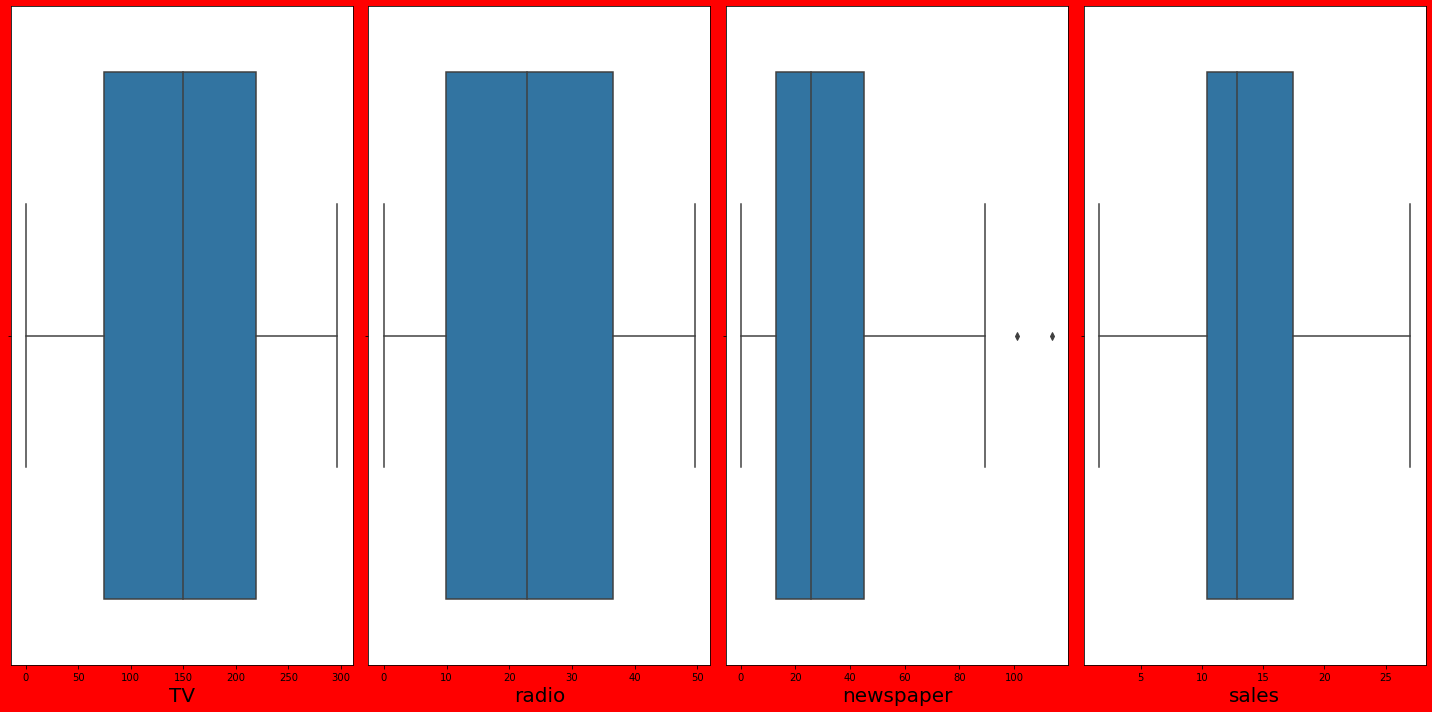

In [26]:
plt.figure(figsize=(20,10), facecolor='Red')
plotnumber=1
for column in dt:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.boxplot(dt[column],orient="v" )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
# Skewness of the data
dt.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [28]:
# Imputation of the median in newspaper
# Finding the IQR
q1=dt.quantile(0.25)
q3=dt.quantile(0.75)
iqr=q3-q1

In [29]:
# Validating one outlier
nps=(q3.newspaper+(1.5*iqr.newspaper))
nps

93.625

In [30]:
# Check the indexes
index=np.where(dt['newspaper']>nps)
index

(array([ 16, 101], dtype=int64),)

In [31]:
dt['newspaper'].median()

25.75

In [32]:
dt.loc[index]

,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [33]:
dt.loc[[ 16, 101],"newspaper"]=dt['newspaper'].median()

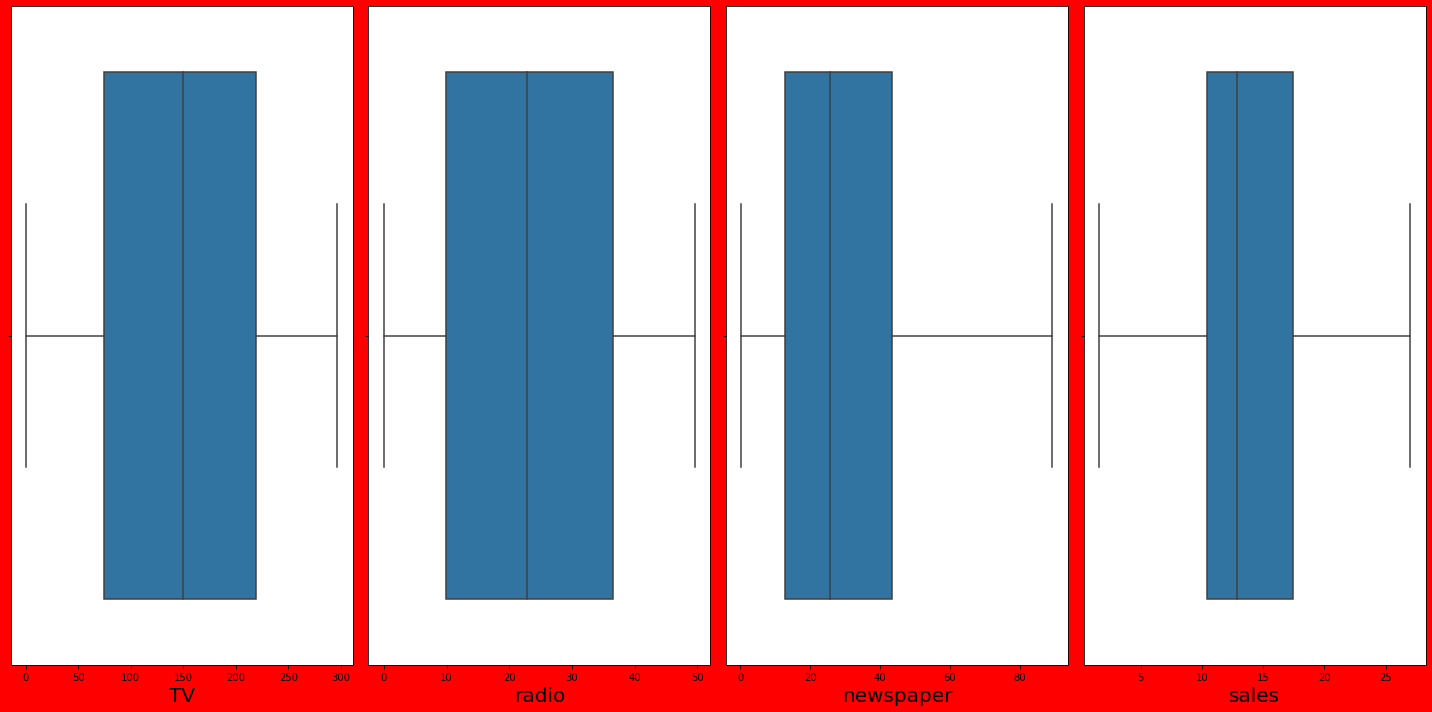

In [34]:
# Box plot after replacing with median
plt.figure(figsize=(20,10), facecolor='Red')
plotnumber=1
for column in dt:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.boxplot(dt[column],orient="v" )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [35]:
# Splitting data for machine learning
X=dt.drop(labels='sales',axis=1)
y=dt.sales

In [36]:
# Standardization
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [37]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [50]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the training accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.8838152316353232
At random state, 1, the training accuracy is :0.8932046345002822


At random state 2, the training accuracy is :0.9073907041892243
At random state, 2, the training accuracy is :0.7562192813171079


At random state 3, the training accuracy is :0.8802426491474803
At random state, 3, the training accuracy is :0.9134960505313001


At random state 4, the training accuracy is :0.8778743051242124
At random state, 4, the training accuracy is :0.9086633358695456


At random state 5, the training accuracy is :0.8835719043305014
At random state, 5, the training accuracy is :0.8983138844673856


At random state 6, the training accuracy is :0.8783435727072737
At random state, 6, the training accuracy is :0.9224495735003383


At random state 7, the training accuracy is :0.8800596940293782
At random state, 7, the training accuracy is :0.9095845590072639


At random state 8, the training accuracy is :0.8997137549004335
At random state, 8,

In [51]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the training accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.996511838868858
At random state, 1, the training accuracy is :0.976309347209216


At random state 2, the training accuracy is :0.9972077006223772
At random state, 2, the training accuracy is :0.972635217114686


At random state 3, the training accuracy is :0.9961623687754961
At random state, 3, the training accuracy is :0.9803584146835127


At random state 4, the training accuracy is :0.9969462102291566
At random state, 4, the training accuracy is :0.9757624062855405


At random state 5, the training accuracy is :0.9971115749589227
At random state, 5, the training accuracy is :0.9874253697540814


At random state 6, the training accuracy is :0.9967526278070213
At random state, 6, the training accuracy is :0.9742825834943997


At random state 7, the training accuracy is :0.9965479243078381
At random state, 7, the training accuracy is :0.9793693985530721


At random state 8, the training accuracy is :0.9968942931142746
At random state, 8, th

In [53]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=1337)
re=RandomForestRegressor()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)
print(f"At random state, {1337}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {1337}, the training accuracy is :{r2_score(y_test, predtest)}")

At random state, 1337, the training accuracy is :0.9963006993906125
At random state, 1337, the training accuracy is :0.9911295350296406


